**Spotify is a very integral part of my day to day life and I thought about exploring top 5 genres on the basis of popularity because it's what the masses enjoy. The purpose of this notebook is to explore and visualize data of the top 5 Genres and furthermore top 5 artists in those top genres, on the basis of popularity. This is my first notebook and any type of constructive feedback will be really helpful.**

### Description of variables:

The dataset contains 232,725 observations of 18 features.

Primary
- track_id (Id of track generated by Spotify)

Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)

Dummy:
- mode (0 = Minor, 1 = Major)

Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- time_signature (notational convention used in Western musical notation to specify how many beats are contained in each measure. For example: '4/4', '5/4', '3/4', '1/4', '0/4')
- artist_name (List of artists mentioned)
- track_name (Name of the song)
- genre (Genre of the song)

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [12]:
data = 'SpotifyFeatures.csv'

In [13]:
spotifydata = pd.read_csv(data)
spotifydata.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


### Data Preprocessing/Exploration[](http://)

In [14]:
spotifydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [15]:
spotifydata.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [16]:
spotifydata.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


**Now we will drop the duplicate tracks falling within multiple genres within the database. We'll furter check if the average popularity of each genre is not hampered much while doing this**

Average popularity of top 5 genres before droping duplicates.

In [17]:
spotifydata.groupby("genre").popularity.mean().sort_values(ascending = False).head()

genre
Pop        66.590667
Rap        60.533795
Rock       59.619392
Hip-Hop    58.423131
Dance      57.275256
Name: popularity, dtype: float64

In [18]:
spotifydata.drop_duplicates(subset = ["track_id"],inplace = True)

Average popularity of top 5 genres after droping duplicates.

In [19]:
spotifydata.groupby("genre").popularity.mean().sort_values(ascending = False).head()

genre
Pop        67.064957
Rap        59.515797
Rock       58.767849
Hip-Hop    58.516660
Dance      57.351541
Name: popularity, dtype: float64

**Selecting top 5 generes on the basis of average popularity for Exploratry Data Analysis.**

In [20]:
topdata = spotifydata.loc[spotifydata.genre.isin(["Pop","Dance","Hip-Hop","Rap","Rock","Dance"])]
topdata

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9028,Dance,Halsey,Without Me,5p7ujcrUXASCNwRaWNHR1C,97,0.2970,0.752,201661,0.488,0.000009,F#,0.0936,-7.050,Major,0.0705,136.041,4/4,0.533
9029,Dance,Ariana Grande,needy,1TEL6MlSSVLSdhOSddidlJ,92,0.7800,0.647,171573,0.309,0.000007,G,0.2020,-7.948,Minor,0.0366,87.045,4/4,0.195
9030,Dance,Ariana Grande,NASA,4uTvPEr01pjTbZgl7jcKBD,91,0.4510,0.747,182000,0.458,0.000000,F#,0.2520,-6.891,Major,0.3030,75.029,4/4,0.470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226488,Rock,Fleetwood Mac,Little Lies,08o75xMKmGrKny6GsXrNJW,60,0.1240,0.630,218040,0.688,0.000048,D,0.1580,-9.816,Major,0.0266,124.825,4/4,0.893
226493,Rock,The Doors,Five To One,5FlBGGwGuqYmqr0qeBWrxe,56,0.2030,0.615,264960,0.401,0.000000,E,0.0860,-14.070,Minor,0.0507,87.959,4/4,0.672
226497,Rock,Black Sabbath,The Wizard - Remastered Version,6sjTzevtstOxOMsFsypsEm,50,0.0335,0.394,262747,0.682,0.000231,A,0.3070,-11.972,Major,0.1110,100.646,4/4,0.361
226501,Rock,The Beatles,I'm Happy Just To Dance With You - Remastered ...,0gd50I2gKioJ59C827EdAY,58,0.1380,0.658,116373,0.537,0.000000,F#,0.0572,-7.535,Minor,0.0307,132.115,4/4,0.887


### EDA

Text(0.5, 1.0, 'No. of Artists per Genre')

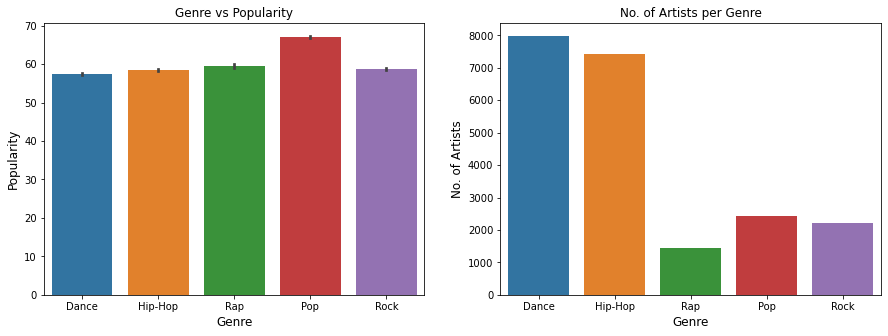

In [21]:
plt.figure(figsize =(15,5))

ax1 = plt.subplot(1,2,1)
sns.barplot(x = topdata["genre"], y=topdata["popularity"])
plt.xlabel("Genre",fontsize = 12)
plt.ylabel("Popularity",fontsize = 12)
plt.title("Genre vs Popularity")

ax2 = plt.subplot(1,2,2)
sns.countplot(x=topdata["genre"], data=topdata)
plt.xlabel("Genre",fontsize = 12)
plt.ylabel("No. of Artists",fontsize = 12)
plt.title("No. of Artists per Genre")

Text(0.5, 1.0, 'Popularity vs Time Signature')

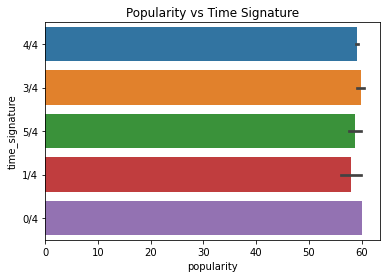

In [47]:
sns.barplot(x = topdata["popularity"], y=topdata["time_signature"])
plt.title("Popularity vs Time Signature")

Text(0.5, 1.0, 'Key vs Popularity')

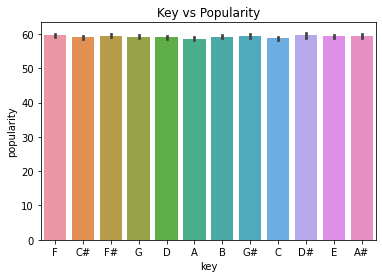

In [48]:
sns.barplot(x = topdata["key"], y= topdata["popularity"])
plt.title("Key vs Popularity")

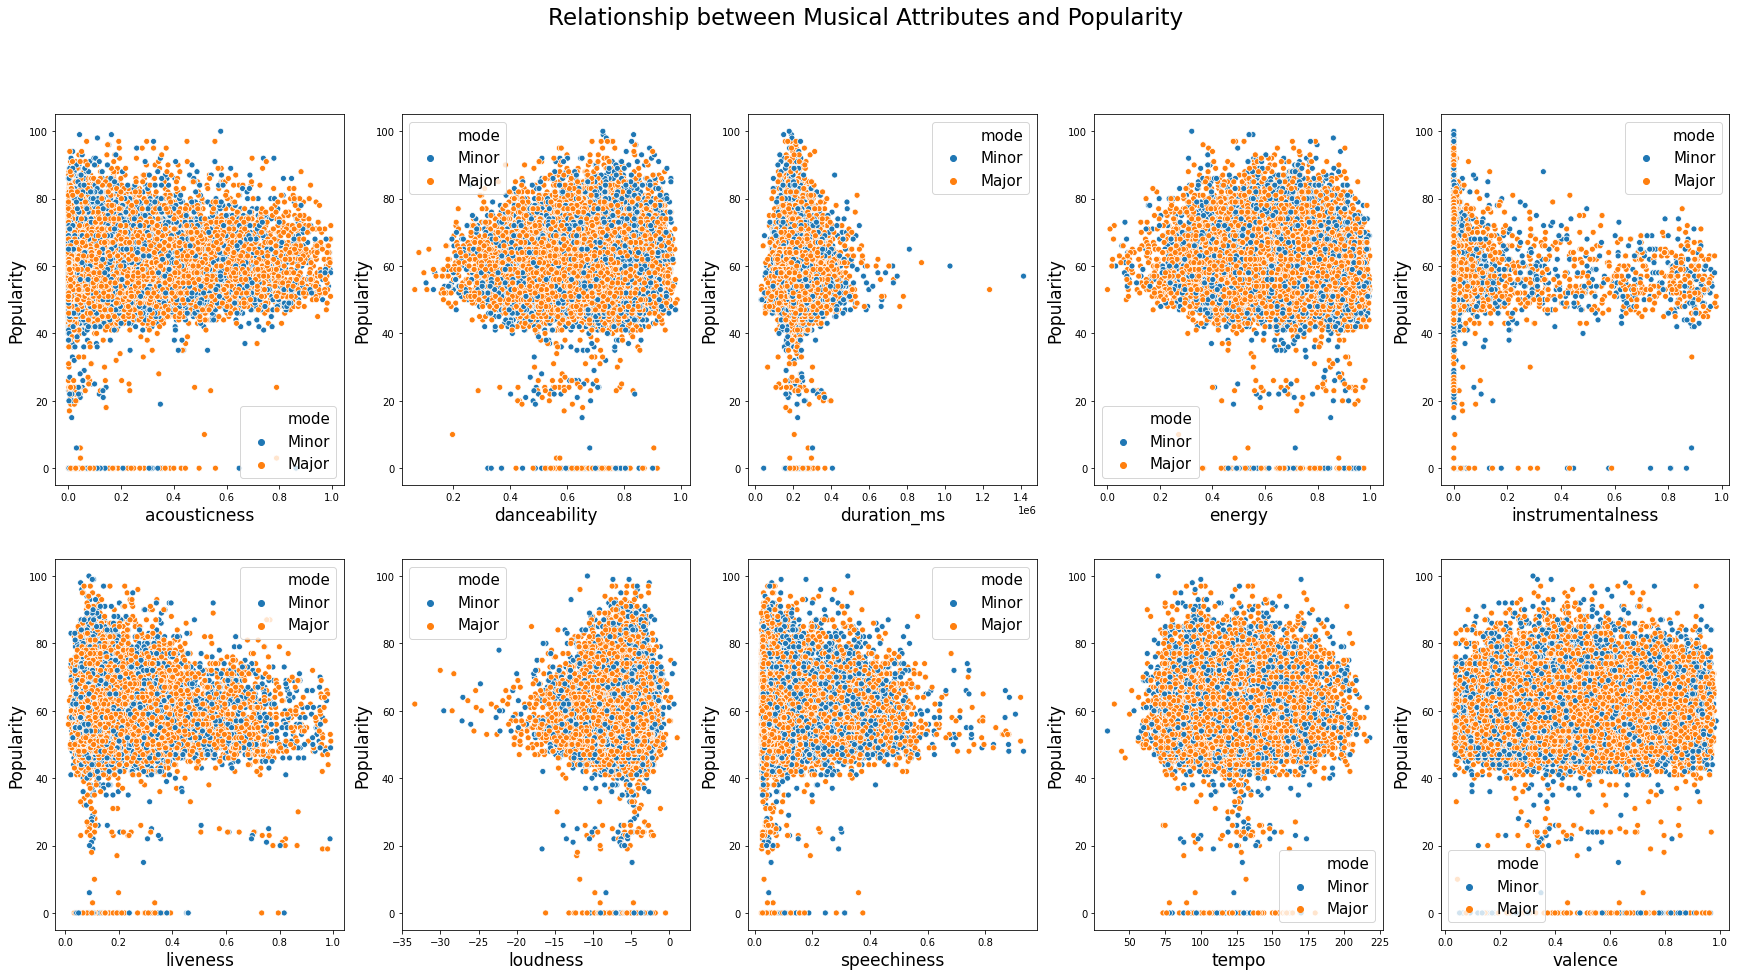

In [41]:
plt.figure(figsize=(30,15))
pltnum = 1

for col in ["acousticness","danceability","duration_ms","energy","instrumentalness","liveness","loudness", "speechiness", "tempo", "valence"]:
    if pltnum<=10:
        ax = plt.subplot(2,5, pltnum)
        sns.scatterplot(x =col, y="popularity", data=topdata, hue= "mode", legend = "full")
        plt.xlabel(col,fontsize = 17)
        plt.ylabel("Popularity",fontsize = 17)
        plt.legend(fontsize = 15)
    pltnum +=1
plt.suptitle("Relationship between Musical Attributes and Popularity",fontsize = 23)
plt.show()

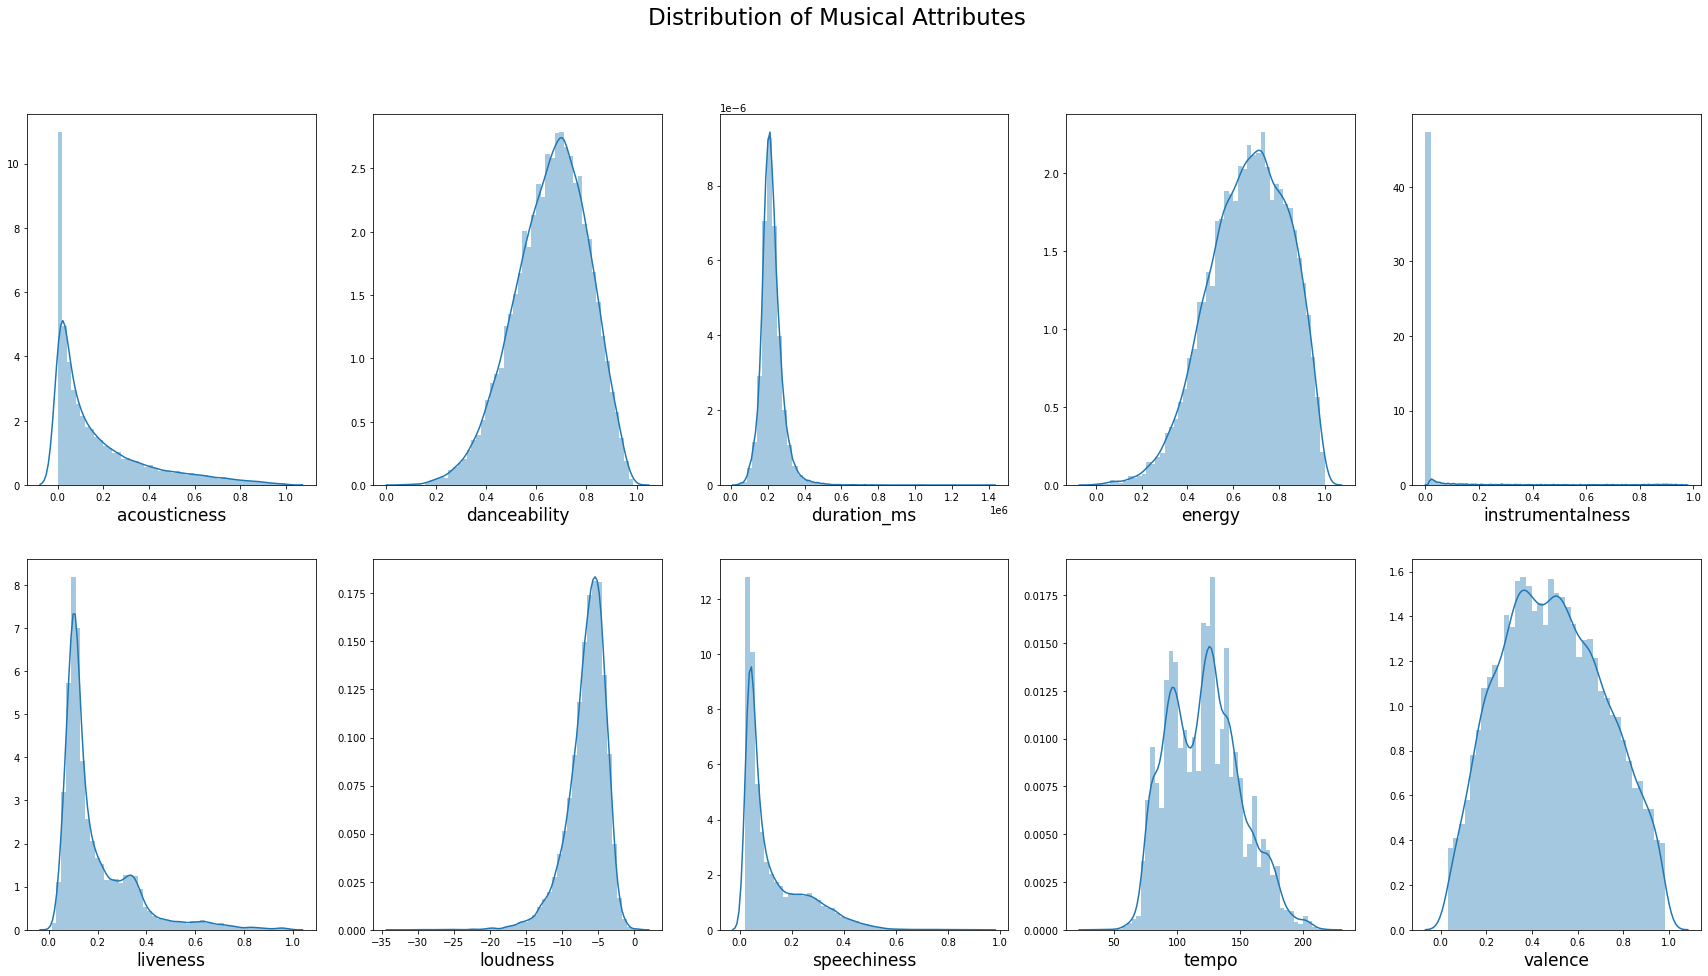

In [49]:
plt.figure(figsize=(30,15))
pltnum = 1

for col in ["acousticness","danceability","duration_ms","energy","instrumentalness","liveness","loudness", "speechiness", "tempo", "valence"]:
    if pltnum<=10:
        ax = plt.subplot(2,5, pltnum)
        sns.distplot(a =topdata[col])
        plt.xlabel(col,fontsize = 17)
    pltnum +=1
plt.suptitle("Distribution of Musical Attributes",fontsize = 23)
plt.show()

Text(0.5, 1.0, 'Correlation between features')

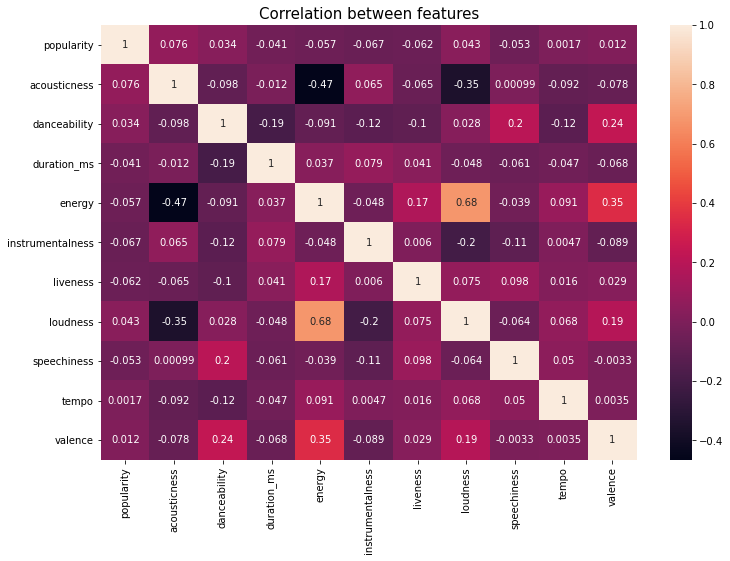

In [46]:
plt.figure(figsize = (12, 8))

sns.heatmap(topdata.corr(), annot=True )
plt.title("Correlation between features", fontsize = 15)

In [27]:
print ("Total number of artists in the top 5 genres: "+str(len(topdata.artist_name.unique())))

Total number of artists in the top 5 genres: 2965


***Let's figure out who were the top 5 artists from these top 5 genres on the basis of most popular tracks***

In [32]:
topdata.groupby("artist_name").popularity.max().sort_values(ascending=False).head(5)

artist_name
Ariana Grande    100
Post Malone       99
Daddy Yankee      98
Sam Smith         97
Halsey            97
Name: popularity, dtype: int64

In [33]:
pop5 = topdata.loc[topdata.artist_name.isin(["Ariana Grande","Post Malone","Daddy Yankee","Sam Smith","Halsey"])]

In [34]:
pop5.groupby("genre").artist_name.unique()

genre
Dance                      [Ariana Grande, Halsey]
Hip-Hop                             [Daddy Yankee]
Pop        [Sam Smith, Post Malone, Ariana Grande]
Rap                                  [Post Malone]
Name: artist_name, dtype: object

***As we can see that some artists among these 5 popular artists have contributed to multiple genres too. Let's explore their tracks on the basis of their popularity***

In [35]:
fig = px.violin(pop5, x = "artist_name", y="popularity", points="all", hover_data=pop5.columns, color =pop5.artist_name)
fig.show()

Plotting the top 5 artists to check the variablity and central value of their musical attributes.

<function matplotlib.pyplot.show(*args, **kw)>

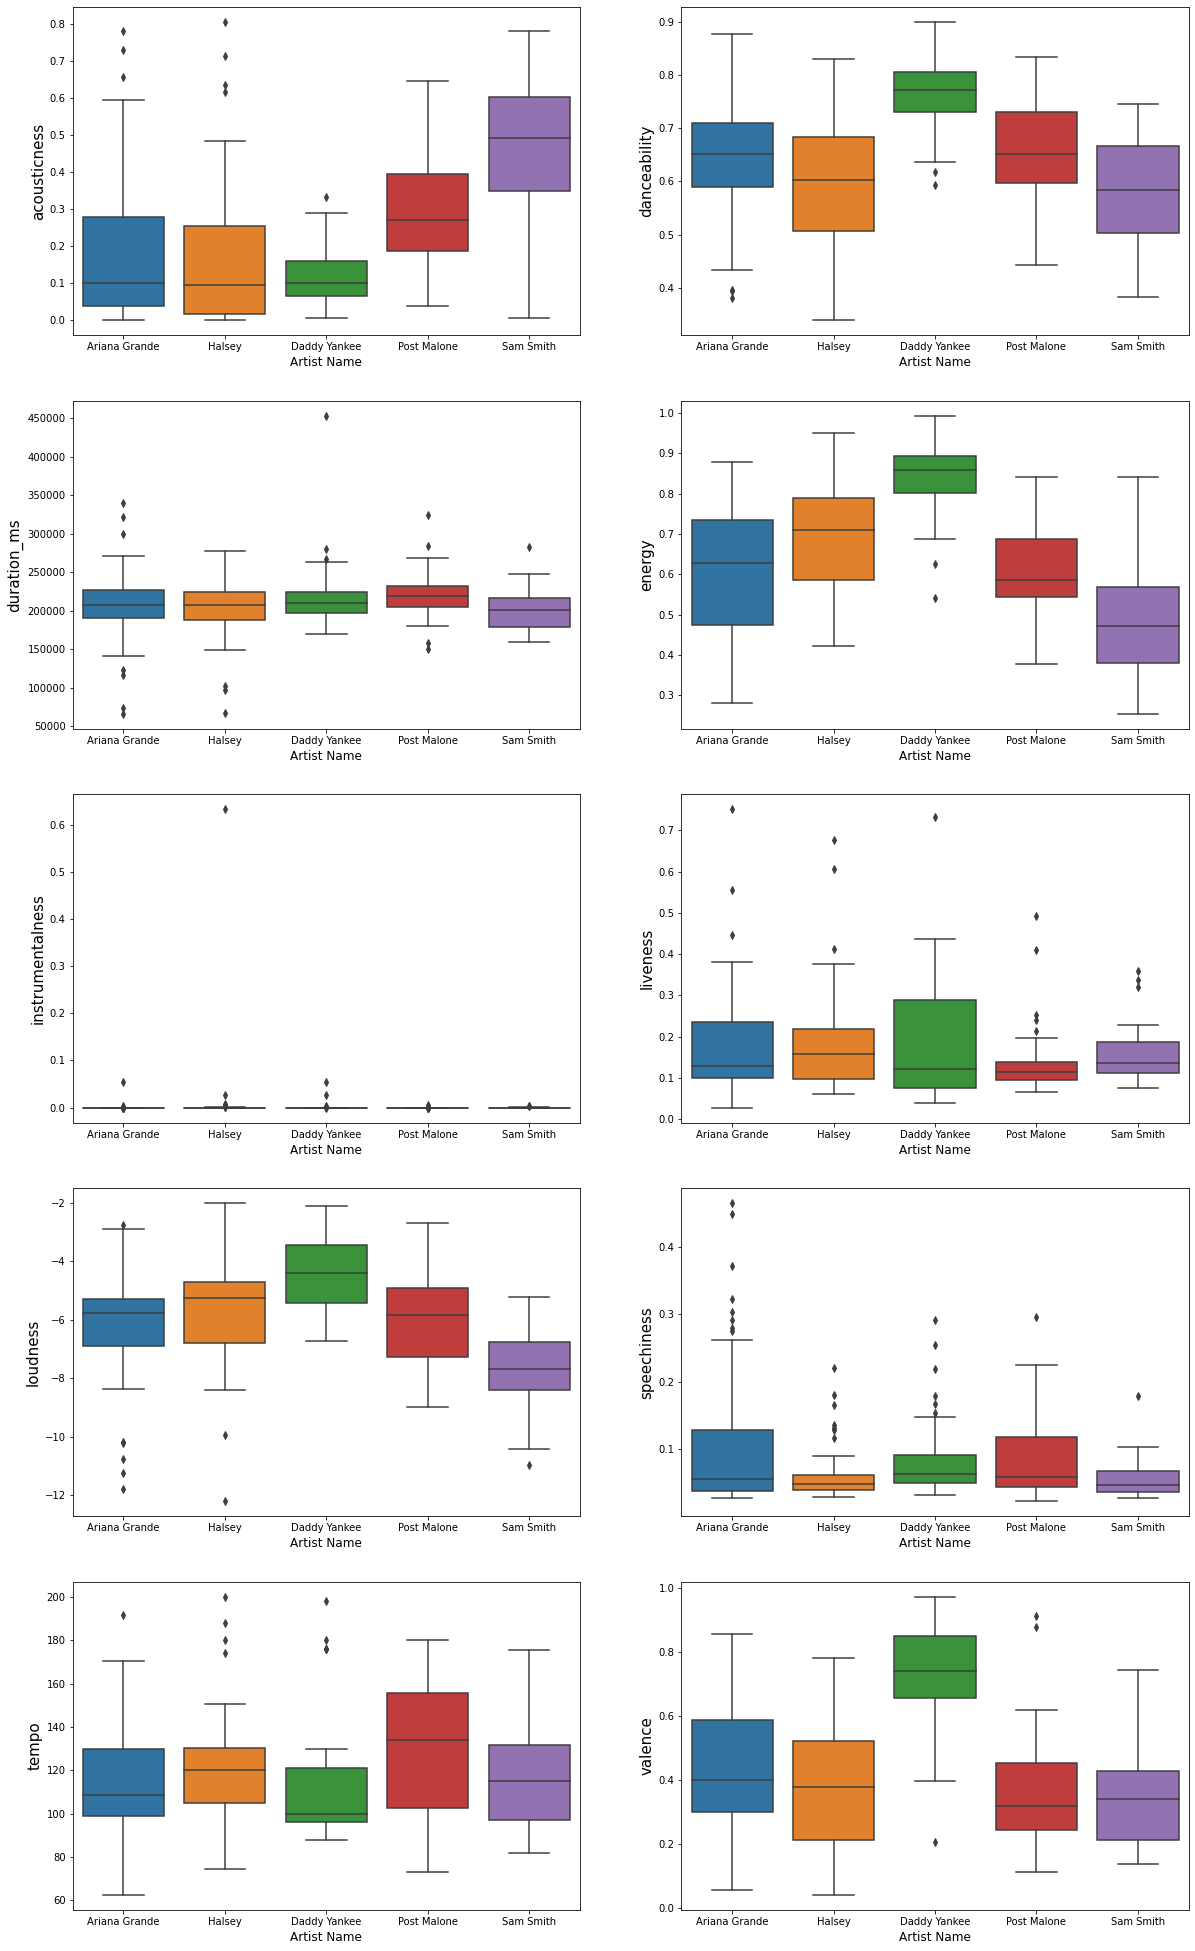

In [36]:
plt.figure(figsize = (20, 35))
pltnum = 1

for col in ["acousticness","danceability","duration_ms","energy","instrumentalness","liveness","loudness", "speechiness", "tempo", "valence"]:
    if pltnum<=10:
        ax = plt.subplot(5,2,pltnum)
        sns.boxplot(x = pop5["artist_name"], y= pop5[col])
        plt.xlabel("Artist Name", fontsize=12)
        plt.ylabel(col,fontsize=15)
    pltnum +=1
plt.show